In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 ## Data Understanding 

In [6]:
df.shape

(1025, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [13]:
df.duplicated().sum()

723

In [14]:
df.drop_duplicates(inplace=True)

# EDA [Explorotry data analysis]

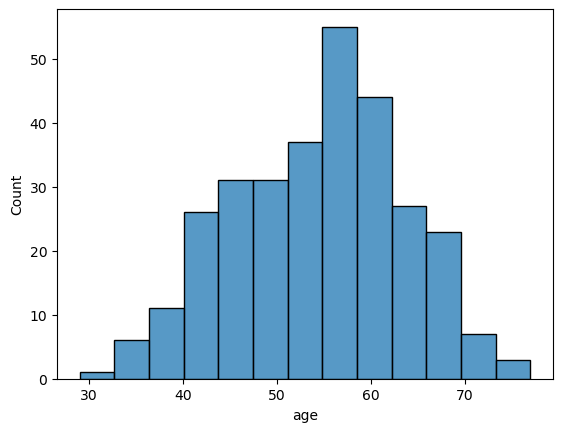

In [16]:
sns.histplot(df['age'])
plt.show()

heart desase by the gender

0-female
1-male

target :
    1-yes desiase
    ,0-no desiase

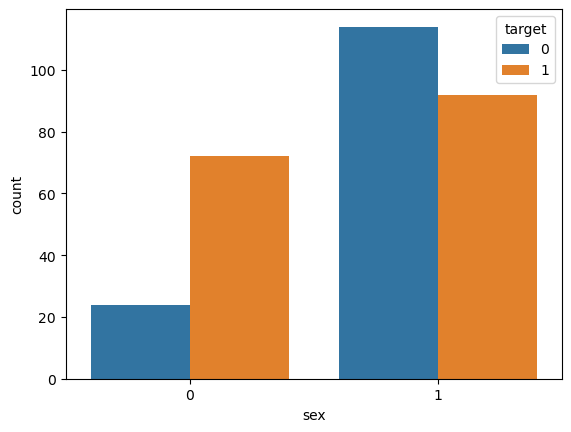

In [18]:
sns.countplot(x='sex',hue='target',data=df)
plt.show()

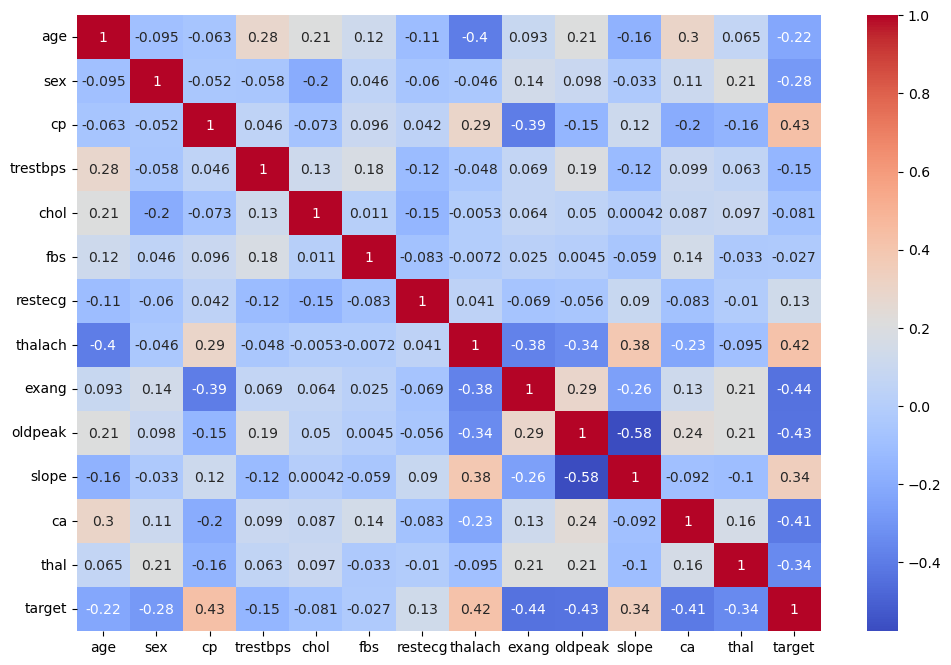

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [21]:
x=df.drop("target",axis=1)
y=df['target']

## Train test split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Model traing

In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate

In [24]:
from sklearn.metrics import accuracy_score,classification_report

In [25]:
y_pred=model.predict(X_test)

In [27]:
print("accuracy_score is :",accuracy_score(y_test,y_pred)*100)

accuracy_score is : 74.72527472527473


In [28]:
print("classification_report is :",classification_report(y_test,y_pred))

classification_report is :               precision    recall  f1-score   support

           0       0.78      0.73      0.75        48
           1       0.72      0.77      0.74        43

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



# Visulizing the tree

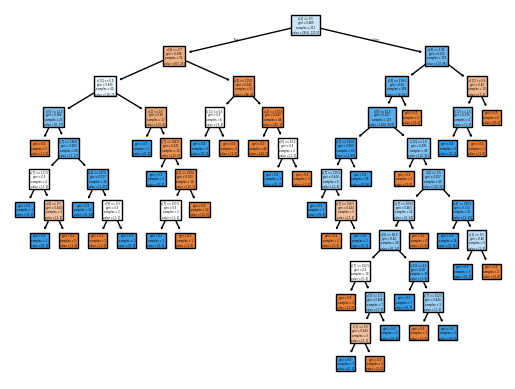

In [37]:
from sklearn import tree
plt.Figure(figsize=(20,15))
tree.plot_tree(model,filled=True)
plt.show()

## Analyszing that which factore affects the desises

In [ ]:
importance = pd.Series(
    model.feature_importances_,
    index=x.columns
)


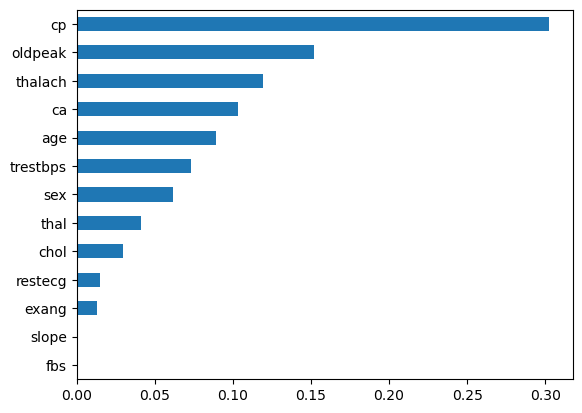

In [41]:
importance.sort_values().plot(kind="barh")
plt.show()

# Hyper parameter tunig

In [52]:
param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20, 25],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [42]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid=GridSearchCV(model,param_grid=param,cv=5)

In [46]:
import warnings
warnings.filterwarnings('ignore')


In [54]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [55]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [56]:
y_pred=grid.predict(X_test)

In [58]:
print("accuracy_score is : ",accuracy_score(y_test,y_pred)*100)

accuracy_score is :  81.31868131868131


In [59]:
print("classification report is: ",classification_report(y_test,y_pred))

classification report is:                precision    recall  f1-score   support

           0       0.80      0.85      0.83        48
           1       0.82      0.77      0.80        43

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [63]:
selected_model=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 10,
 splitter= 'random')

In [65]:
selected_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=10, splitter='random')

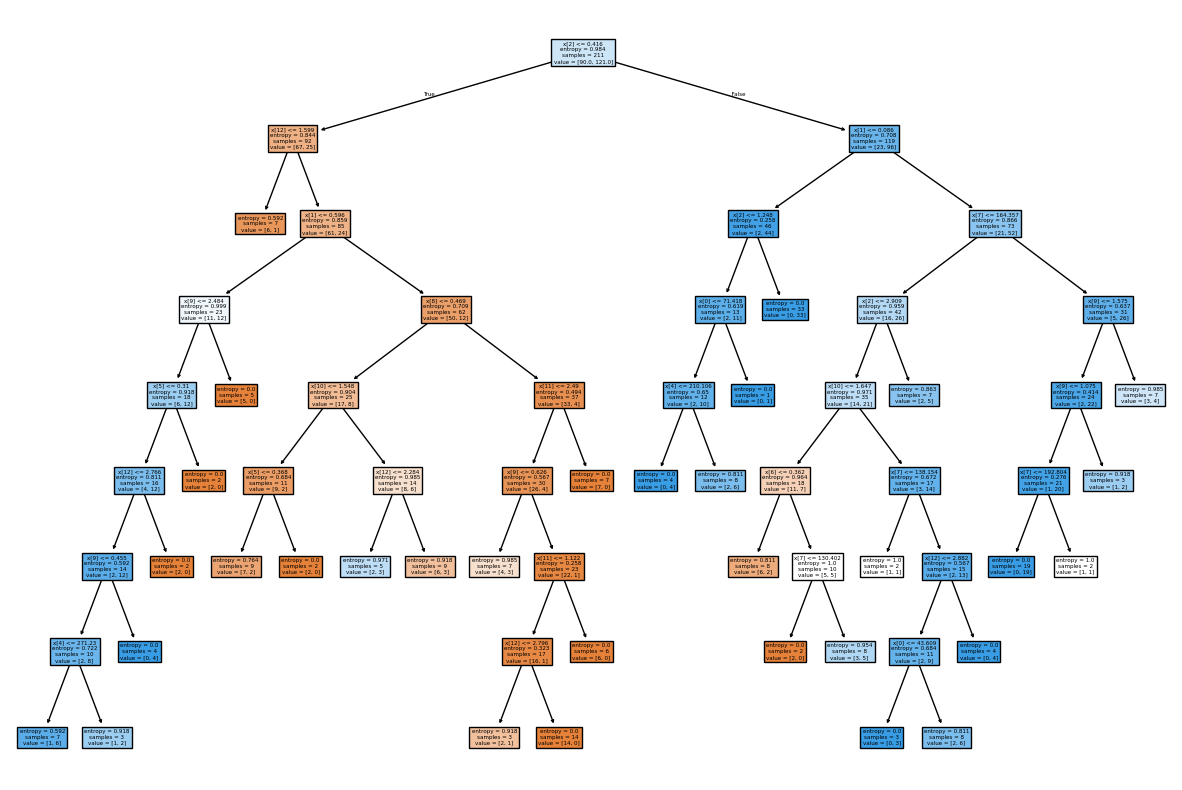

In [67]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selected_model,filled=True)
plt.show()

# After Hyper parameter tuning which parametrs or columns affets the mostfor the desise

In [68]:
importance = pd.Series(
    selected_model.feature_importances_,
    index=x.columns
)


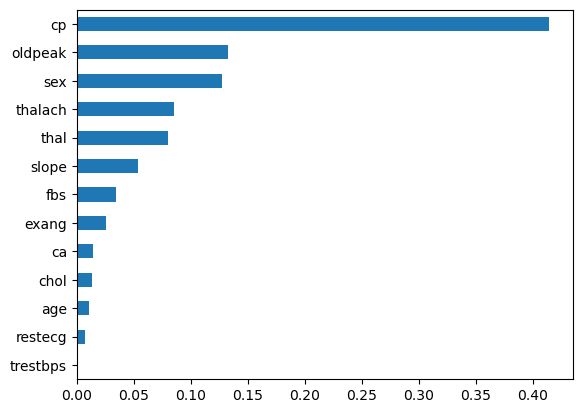

In [69]:
importance.sort_values().plot(kind="barh")
plt.show()

## overfitting checking of the model

In [ ]:
print("Model accuracy is on train data :",selected_model.score(X_train,y_train)*100)
print("Model accuracy is on test data :",selected_model.score(X_test,y_test)*100)

Model accuracy is on train data : 85.30805687203792
Model accuracy is on test data : 78.02197802197803


## Comaparing with the other models also for the evluation

In [72]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [77]:
print("Logistic Accuracy:", lr.score(X_test, y_test))
print("Decision Tree Accuracy:", model.score(X_test, y_test))
print("Decision tree accuracy after hyperparametr tuning :",selected_model.score(X_test,y_test))

Logistic Accuracy: 0.8351648351648352
Decision Tree Accuracy: 0.7472527472527473
Decision tree accuracy after hyperparametr tuning : 0.7802197802197802


## ON comaparing with the Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", rf.score(X_test, y_test)*100)


Random Forest Accuracy: 81.31868131868131


## Comparing the all the models at time

model got overriten so i did like this we can direclty make dictonry and use it

In [88]:
dt_before = DecisionTreeClassifier(random_state=42)
dt_before.fit(X_train, y_train)

dt_after = selected_model   # your tuned model

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [91]:
models = {
    "Decision Tree (Before Tuning)": dt_before.score(X_test, y_test),
    "Decision Tree (After Tuning)": dt_after.score(X_test, y_test),
    "Logistic Regression": lr.score(X_test, y_test),
    "Random Forest": rf.score(X_test, y_test)
}

for name, score in models.items():
    print(name, ":", score*100)


Decision Tree (Before Tuning) : 74.72527472527473
Decision Tree (After Tuning) : 78.02197802197803
Logistic Regression : 83.51648351648352
Random Forest : 81.31868131868131


## ROC curve for the Descion tree model


In [93]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [97]:
y_prob=selected_model.predict_proba(X_test)[:, 1]

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


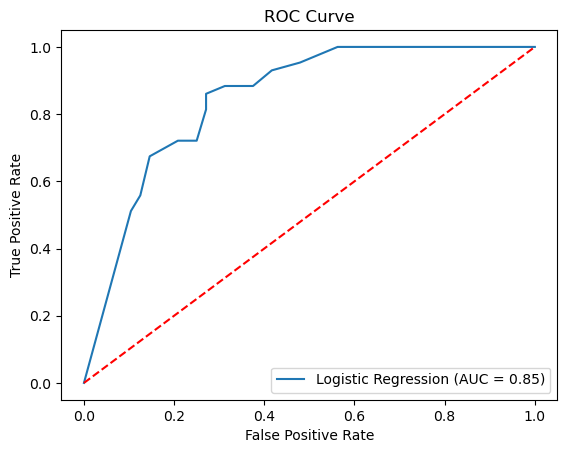

In [99]:

plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'r--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## for all model roc curve

In [ ]:
##